In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Advertising.csv')

In [5]:
X=df.drop('sales' , axis=1)
y=df['sales']

# selecting model

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [9]:
train_RMSE_error=[]
test_RMSE_error=[]

for d in range(1,10):
    # create poly data set for degree 'd'
    polynomial_converter=PolynomialFeatures(degree=d , include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)

    # split this new poly data set
    X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)

    # train on this new poly data set
    model=LinearRegression(fit_intercept=True)
    model.fit(X_train , y_train)

    # predict on both train & test 
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)


    # calculate errors

    # train errors
    train_RMSE=np.sqrt(mean_squared_error(train_predict , y_train))

    # test errors
    test_RMSE=np.sqrt(mean_squared_error(test_predict , y_test))



    #append errors to list for ploting later
    train_RMSE_error.append(train_RMSE)
    test_RMSE_error.append(test_RMSE)

    

Text(0, 0.5, 'RMSE')

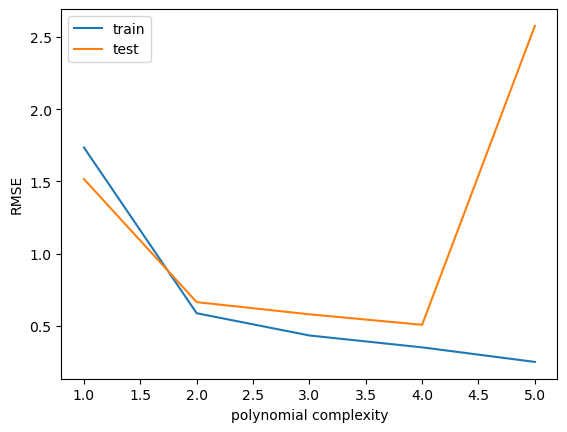

In [11]:
plt.plot(range(1,6) , train_RMSE_error[:5], label='train')
plt.plot(range(1,6) , test_RMSE_error[:5] , label='test')
plt.legend()
plt.xlabel('polynomial complexity')
plt.ylabel('RMSE')

(0.0, 100.0)

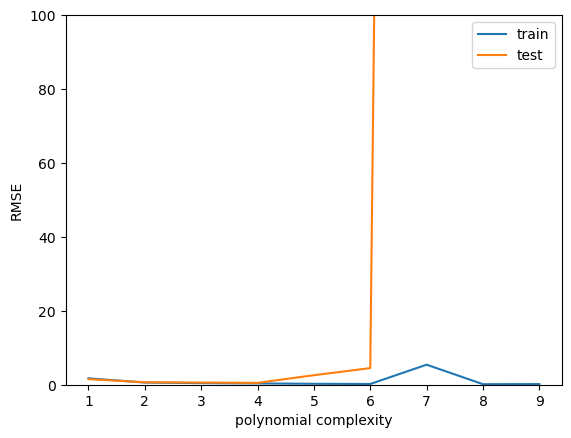

In [13]:
plt.plot(range(1,10), train_RMSE_error, label='train')
plt.plot(range(1,10), test_RMSE_error, label='test')
plt.legend()
plt.xlabel('polynomial complexity')
plt.ylabel('RMSE')
plt.ylim(0,100)

# deploy model

In [21]:
final_poly_convertor=PolynomialFeatures(degree=3, include_bias=False)
final_poly_features=final_poly_convertor.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(final_poly_features, y, test_size=0.3, random_state=101)

In [29]:
final_model=LinearRegression(fit_intercept=True)

In [31]:
final_model.fit(final_poly_features , y)

LinearRegression()

# save model

In [33]:
from joblib import dump , load

In [35]:
dump(final_poly_convertor , 'final_poly_convertor.joblib')
dump(final_model , 'final_model.joblib')

['final_model.joblib']

In [37]:
loded_model=load('final_model.joblib')
loaded_poly=load('final_poly_convertor.joblib')

In [39]:
campaign=[[149,22,12]]

In [43]:
campaign_poly=loaded_poly.transform(campaign)
campaign_poly

C:\Users\Ziba\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.490000e+02, 2.200000e+01, 1.200000e+01, 2.220100e+04,
        3.278000e+03, 1.788000e+03, 4.840000e+02, 2.640000e+02,
        1.440000e+02, 3.307949e+06, 4.884220e+05, 2.664120e+05,
        7.211600e+04, 3.933600e+04, 2.145600e+04, 1.064800e+04,
        5.808000e+03, 3.168000e+03, 1.728000e+03]])

In [45]:
final_model.predict(campaign_poly)

array([14.64501014])